In [1]:
# import tensorflow as tf

# physical_devices = tf.config.list_physical_devices('GPU')
# try:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)
# except:
#     # Invalid device or cannot modify virtual devices once initialized.
#     pass

In [19]:
import os

base_dir = './image'

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')

train_0_dr = os.path.join(train_dir, '0')
train_1_dr = os.path.join(train_dir, '1')

validation_dir = os.path.join(base_dir, 'validation')

validation_0_dir = os.path.join(validation_dir, '0')
validation_1_dir = os.path.join(validation_dir, '1')

In [20]:
len(os.listdir(validation_0_dir))

562

In [21]:
len(os.listdir(validation_1_dir))

517

In [22]:
len(os.listdir(path=validation_dir))

2

In [23]:
from keras import layers
from keras import models
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [58]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(72, 144, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 70, 142, 32)       896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 33, 69, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 34, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 34816)             0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [60]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001), #default: 0.001
              metrics=['acc'])

In [61]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(        
        train_dir,
        target_size=(72, 144),
        batch_size=50,          
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(72, 144),
        batch_size=50,
        class_mode='binary')

Found 1076 images belonging to 2 classes.
Found 1079 images belonging to 2 classes.


In [63]:
history = model.fit(train_generator,epochs=20, validation_data=validation_generator, validation_steps=20)

Epoch 1/20
22/22 [==============================] - 1s 35ms/step - loss: 0.3840 - acc: 0.8764 - val_loss: 0.8348 - val_acc: 0.4970
Epoch 2/20
22/22 [==============================] - 1s 35ms/step - loss: 0.3524 - acc: 0.8848 - val_loss: 0.9354 - val_acc: 0.4760
Epoch 3/20
22/22 [==============================] - 1s 34ms/step - loss: 0.3347 - acc: 0.8894 - val_loss: 0.8768 - val_acc: 0.5140
Epoch 4/20
22/22 [==============================] - 1s 34ms/step - loss: 0.3028 - acc: 0.9154 - val_loss: 0.8933 - val_acc: 0.5130
Epoch 5/20
22/22 [==============================] - 1s 33ms/step - loss: 0.2828 - acc: 0.9229 - val_loss: 0.8932 - val_acc: 0.5060
Epoch 6/20
22/22 [==============================] - 1s 34ms/step - loss: 0.2524 - acc: 0.9340 - val_loss: 0.9487 - val_acc: 0.5240
Epoch 7/20
22/22 [==============================] - 1s 34ms/step - loss: 0.2383 - acc: 0.9368 - val_loss: 0.9697 - val_acc: 0.4850
Epoch 8/20
22/22 [==============================] - 1s 33ms/step - loss: 0.2119 - a

In [64]:
model.save('./model/stock_model3.hdf5')

In [24]:
import FinanceDataReader as fdr

In [26]:
kakao = fdr.DataReader('035720', '2022-05-19')
kakao

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-05-19,80500,81000,80000,80400,1519533,-0.026634
2022-05-20,80800,83300,80400,83000,1561541,0.032338
2022-05-23,82700,83500,82400,82900,933750,-0.001205
2022-05-24,82500,82600,80600,80600,1154150,-0.027744
2022-05-25,81000,82000,80300,81800,1365261,0.014888
2022-05-26,81900,83300,81000,81500,1338305,-0.003667
2022-05-27,82400,83000,81500,81700,1038755,0.002454
2022-05-30,82800,84000,82600,83900,2091429,0.026928
2022-05-31,84100,85000,82900,85000,2170810,0.013111


In [27]:
kakao1 = fdr.DataReader('035720', '2022-05-19', '2022-06-02')

In [28]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc

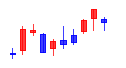

In [30]:
fig = plt.figure(figsize=(2,1))
ax = fig.add_subplot(111)

candlestick2_ohlc(ax, kakao1['Open'].to_list(), kakao1['High'].to_list(), 
                  kakao1['Low'].to_list(), kakao1['Close'].to_list(),
                  width=0.5, colorup='r', colordown='b')
  
plt.axis('off')

plt.savefig('./image/test/1.png')

In [65]:
import cv2

#이미지 읽기
imagex = cv2.imread('./image/test/1.png', cv2.IMREAD_COLOR)

In [66]:
imagex = imagex / 255.0

In [67]:
img = np.resize(imagex, (1, 72, 144, 3))

In [68]:
img.shape

(1, 72, 144, 3)

In [69]:
pred = model.predict(img)

1/1 [==============================] - 0s 31ms/step


In [70]:
import numpy as np
np.argmax(pred[0])

0

In [71]:
pred[0]

array([0.03813576], dtype=float32)